In [ ]:
#mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import necesary library
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
#here we use sample dataset from tensorflow itself, store the dataset url in a variable
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [ ]:
# downloading data from the tensorflow sample dataset
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

228813984/228813984 [==============================] - 8s 0us/step


In [ ]:
data_dir
#path of image folder
#This will have 5 folders and each folder corresponds to specific kind of flower


PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
#3670 images are found in dataset
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


Data contains 5 classes of flowers


1.   daisy
2.   dandelion
3.   sunflowers
4.   roses
5.   tuplips



Sunflower Images count:  699


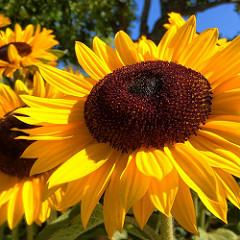

In [ ]:
#sample images of sunflower
sun = list(data_dir.glob('sunflowers/*'))
print("Sunflower Images count: ",len(sun))
# image path loading an Image
PIL.Image.open(str(sun[0]))

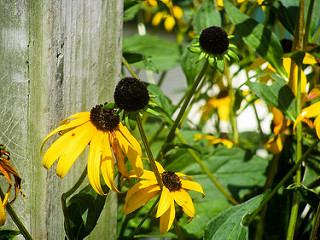

In [ ]:
PIL.Image.open(str(sun[2]))

In [ ]:
#loading  a Data using keras
#setting batch size and image property
batch_size = 32
width = 150
height= 150

In [ ]:
#Splitting train and Validation set using keras
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,image_size=(height, width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
#Splitting train and Validation set using keras
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,image_size=(height, width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


Classes:  ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


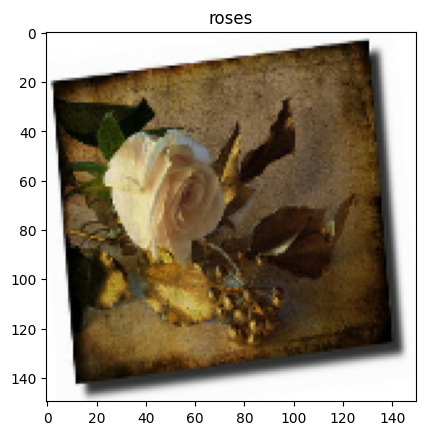

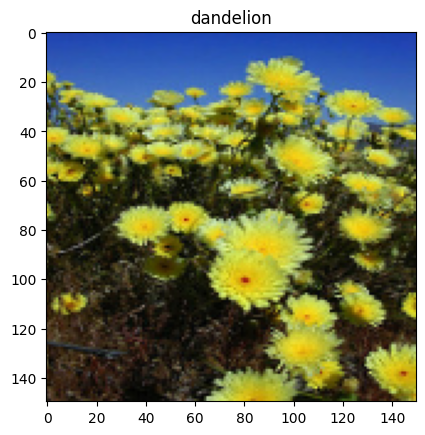

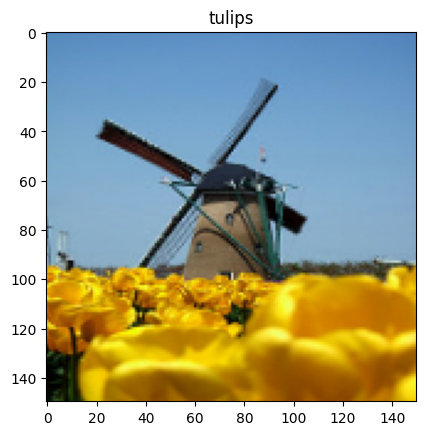

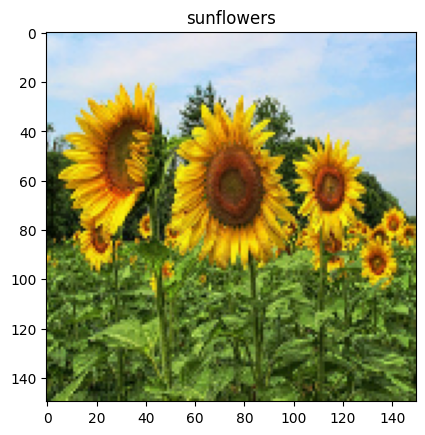

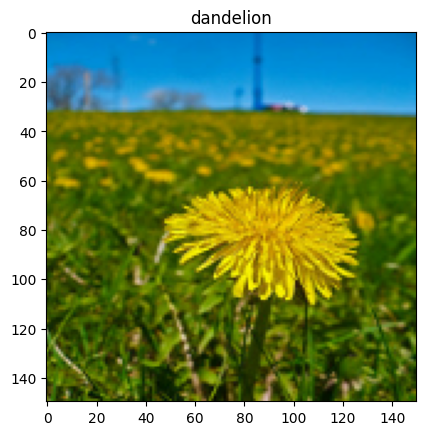

In [ ]:
# few images from sample dataset
class_names = train_ds.class_names
print("Classes: ",class_names)
for img,labels in train_ds.take(1):
  for n in range(5):
    plt.imshow(img[n].numpy().astype("uint8"))
    plt.title(class_names[labels[n]])
    plt.show()

In [ ]:
for image_batch, labels_batch in train_ds:
  print("Image Shape", image_batch.shape)
  print("Labels: ", labels_batch.shape)
  break

Image Shape (32, 150, 150, 3)
Labels:  (32,)


In [ ]:
#Prefetching dataset
#dataset will be loaded before training start
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
#pixel values will be ranges from 0 - 255
#to reduce the complexity nomalizing the image that converting all values to 0 - 1
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))


In [ ]:
#add data augumentation which reduce overfitting
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(height,width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
#model building
num_classes = len(class_names)
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
#compiling the model with optimizer and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                 

In [ ]:
#model training
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
92/92 [==============================] - 20s 36ms/step - loss: 1.3086 - accuracy: 0.4479 - val_loss: 1.1792 - val_accuracy: 0.5163
Epoch 2/20
92/92 [==============================] - 2s 20ms/step - loss: 1.0239 - accuracy: 0.5821 - val_loss: 1.0210 - val_accuracy: 0.6117
Epoch 3/20
92/92 [==============================] - 2s 20ms/step - loss: 0.9290 - accuracy: 0.6311 - val_loss: 0.9626 - val_accuracy: 0.6349
Epoch 4/20
92/92 [==============================] - 2s 21ms/step - loss: 0.8580 - accuracy: 0.6584 - val_loss: 1.0259 - val_accuracy: 0.6322
Epoch 5/20
92/92 [==============================] - 2s 21ms/step - loss: 0.8053 - accuracy: 0.6809 - val_loss: 0.9246 - val_accuracy: 0.6431
Epoch 6/20
92/92 [==============================] - 2s 23ms/step - loss: 0.7802 - accuracy: 0.6924 - val_loss: 1.0021 - val_accuracy: 0.6281
Epoch 7/20
92/92 [==============================] - 2s 20ms/step - loss: 0.7344 - accuracy: 0.7207 - val_loss: 0.8095 - val_accuracy: 0.6962
Epoch 8/20
9

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(epochs)

maxium accuracy from 20 epochs:  83.75%



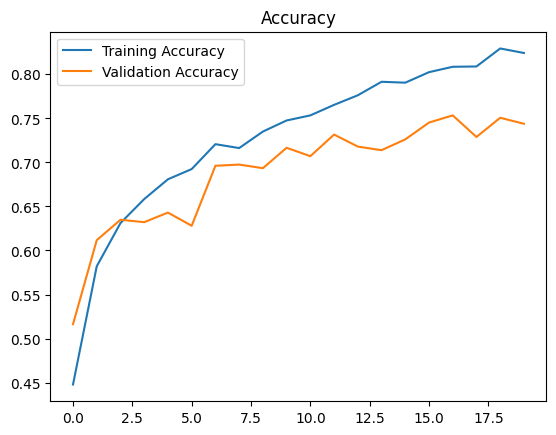

In [ ]:
#plotiing the accuracy
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")
print("maxium accuracy from 20 epochs: " ,"83.75%\n")

In [ ]:
model.save('/content/drive/MyDrive/flowerclass/flower.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#testing the model with unseen image
import cv2
from keras.preprocessing import image
img = image.load_img(r"/content/test2.jpg",target_size = (150,150,3))

tulips


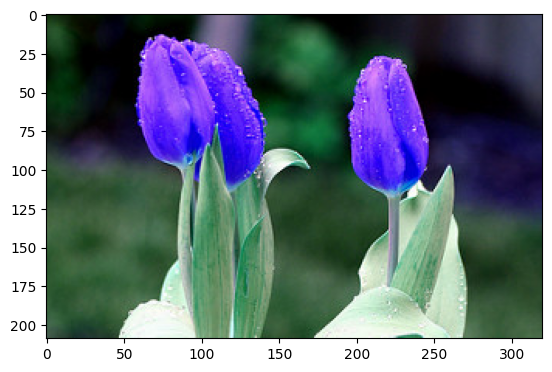

In [92]:
data = cv2.imread(r"/content/test2.jpg")
test_image = image.img_to_array(img)
plt.imshow(data.astype("uint8"))
test_image = test_image.reshape(1,150,150,3)
print("tulips")

In [93]:
new_model = tf.keras.models.load_model(r"/content/drive/MyDrive/flowerclass/flower.h5")

In [94]:
# Predicted Flower name :
name=class_names[np.argmax(new_model.predict(test_image))]

1/1 [==============================] - 0s 82ms/step


In [95]:
name

'tulips'

In [96]:
#some basic instruction for the plants based on flowers
instruction={'daisy': 'Plant in well-drained soil with full sun, water regularly, and deadhead spent blooms for continuous flowering.',
             'dandelion':'Thrives in various conditions; just keep the soil moist, and allow some to go to seed for a natural look.',
             'sunflowers':'Plant in full sun, water deeply but infrequently, and support tall varieties as they grow.',
             'roses':'Plant in well-drained soil with at least six hours of sunlight, water at the base, and prune in spring for healthy growth.',
             'tulips':"Plant in well-drained soil, water moderately, and allow foliage to wither naturally after blooming for next year's growth."
}


In [97]:
#as soon as the plant is identified getting the instruction for the specific plant
for i in instruction.keys():
  if i == name:
    print('plant is',i)
    print('the instructions are',instruction[i])

plant is tulips
the instructions are Plant in well-drained soil, water moderately, and allow foliage to wither naturally after blooming for next year's growth.
